In [ ]:
#https://www.kaggle.com/datasets/carrie1/ecommerce-data

**Import Libraries**

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Loading Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('data.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Check for missing values**

In [ ]:
# Check for null values
print("Checking for null values:")
print(df.isnull().sum())

Checking for null values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Optional: drop Description column (not used)
# df.drop(columns=['Description'], inplace=True)

# Convert CustomerID to int
df['CustomerID'] = df['CustomerID'].astype(int)

# Create TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Target: HighPurchase = top 25% of TotalAmount
threshold = df['TotalAmount'].quantile(0.75)
df['HighPurchase'] = (df['TotalAmount'] > threshold).astype(int)

/tmp/ipython-input-28-1022560024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
/tmp/ipython-input-28-1022560024.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [ ]:
# Check for null values
print("Checking for null values:")
print(df.isnull().sum())

Checking for null values:
InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalAmount     0
HighPurchase    0
dtype: int64


**Encode Categorical Features (Country)**

In [ ]:
# Step 4: One-hot encode 'Country'
country_encoded = pd.get_dummies(df['Country'], drop_first=True)

# Optional: create additional features from InvoiceDate
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Combine features (exclude TotalAmount to prevent leakage)
df_model = pd.concat([
    df[['Quantity', 'UnitPrice', 'CustomerID', 'DayOfWeek', 'Hour', 'HighPurchase']],
    country_encoded
], axis=1)


**Train-Test Split**

In [ ]:
# Step 5: Train-test split
X = df_model.drop('HighPurchase', axis=1)
y = df_model['HighPurchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Train the Decision Tree Classifier**

In [ ]:
# Step 6: Train the Decision Tree Classifier (with more depth!)
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

**Evaluate the Model**

In [ ]:
# Step 7: Evaluate the model
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[61208     1]
 [    2 20155]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     61209
           1       1.00      1.00      1.00     20157

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366

Accuracy Score: 0.9999631295627166


**Visualize the Decision Tree**

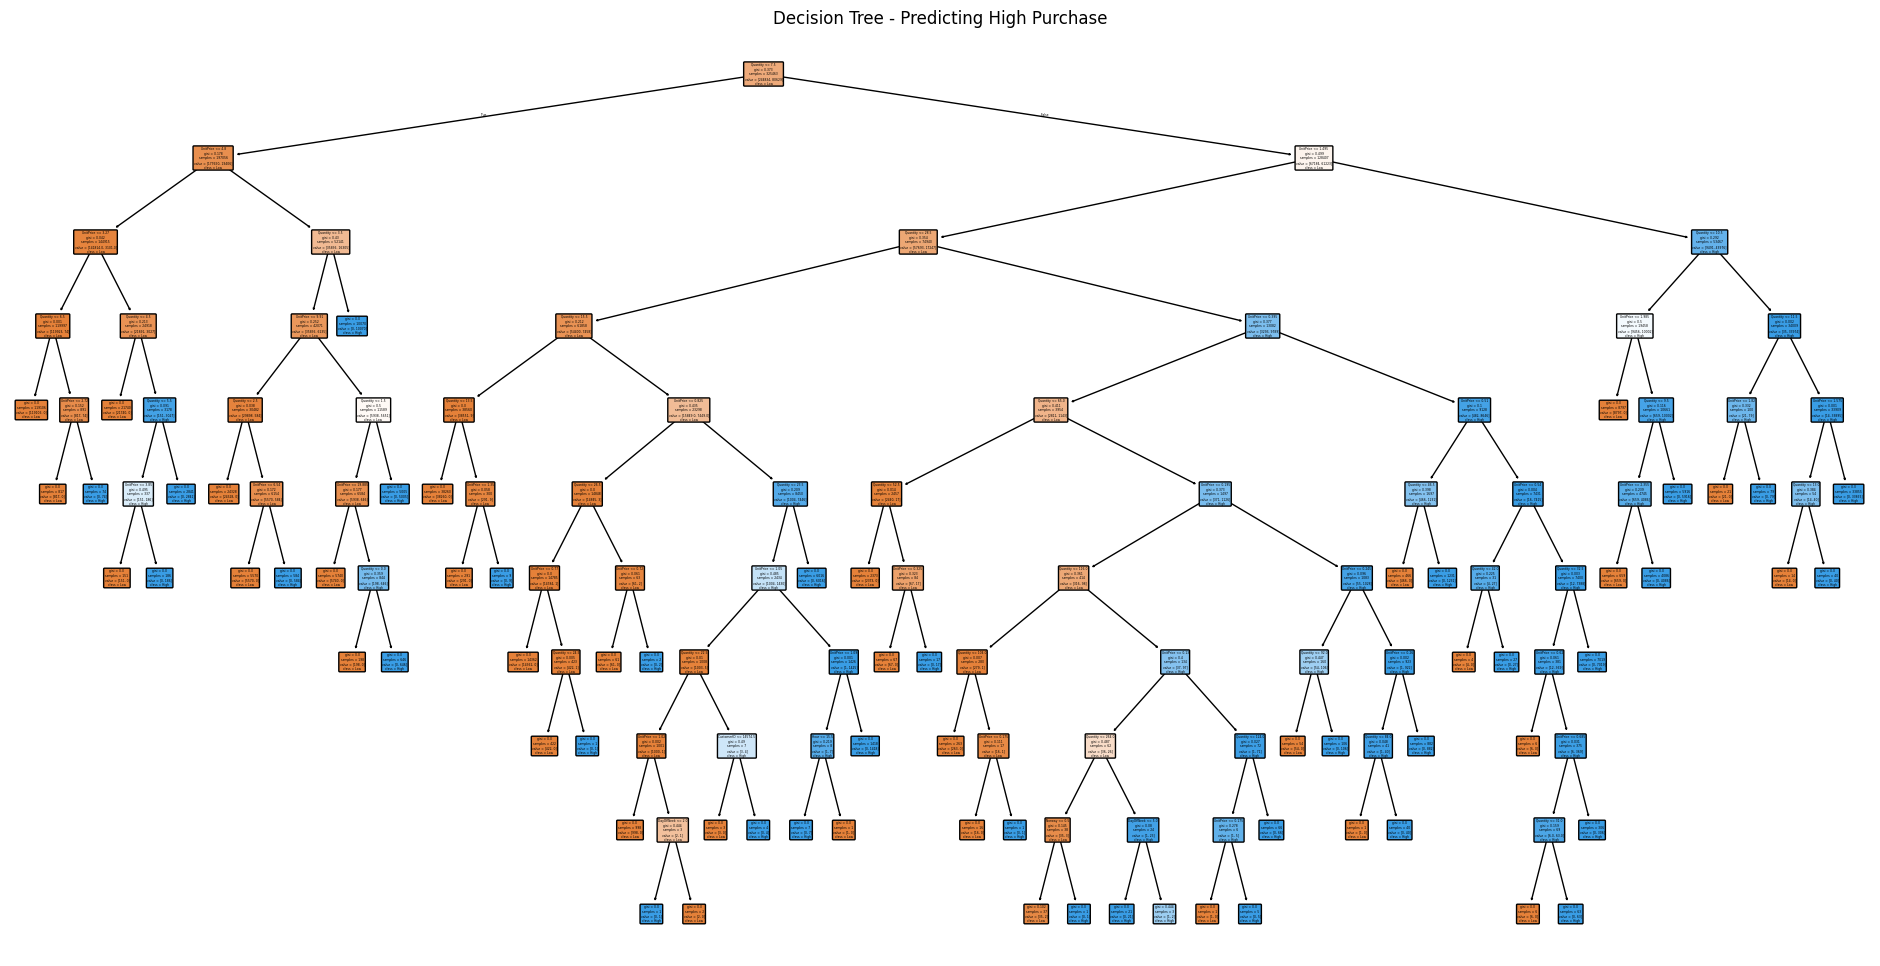

In [ ]:
# Step 8 : Visualize the tree
plt.figure(figsize=(24, 12))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Low", "High"], rounded=True)
plt.title("Decision Tree - Predicting High Purchase")
plt.show()


**Feature Importance**

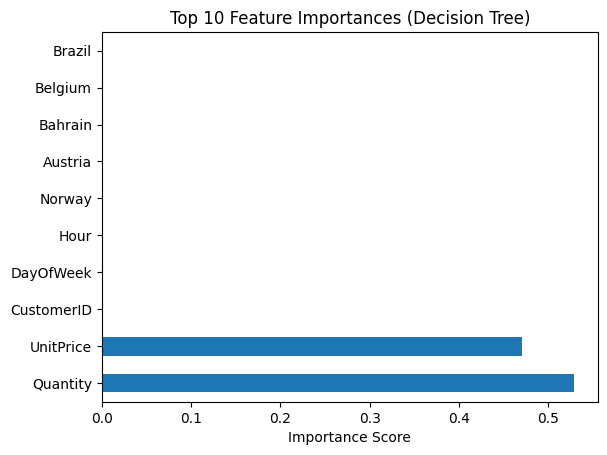

In [ ]:
# Step 9: Show top feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()
